In [47]:
# Libraries For Basic Operations
import numpy as np 
import pandas as pd 

import math
import statistics

from pandas.plotting import scatter_matrix, parallel_coordinates

from sklearn import preprocessing

import scipy.stats
from scipy.stats import anderson
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
# Load 'titanic' dataset.
titanic_df = pd.read_csv('titanic.csv')

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
# View 'titanic' dataset initial records.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Generate 'titanic' dataset dimensions.
titanic_df.shape

(1309, 12)

In [5]:
# Generate 'titanic' dataset data types.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [6]:
# View 'titanic' dataset descriptive statistics.
titanic_df.describe().map('{:,.3f}'.format)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,"1,309.000",891.000,"1,309.000","1,046.000","1,309.000","1,309.000","1,308.000"
mean,655.000,0.384,2.295,29.881,0.499,0.385,33.295
std,378.020,0.487,0.838,14.413,1.042,0.866,51.759
min,1.000,0.000,1.000,0.170,0.000,0.000,0.000
25%,328.000,0.000,2.000,21.000,0.000,0.000,7.896
50%,655.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,982.000,1.000,3.000,39.000,1.000,0.000,31.275
max,"1,309.000",1.000,3.000,80.000,8.000,9.000,512.329


In [ ]:
# Assess missing values per feature in 'titanic' dataset.
titanic_missing = titanic_df.isna().sum()
titanic_missing

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
# Evaluate the 'Survived' binary outcome variable for the training dataset.
titanic_df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

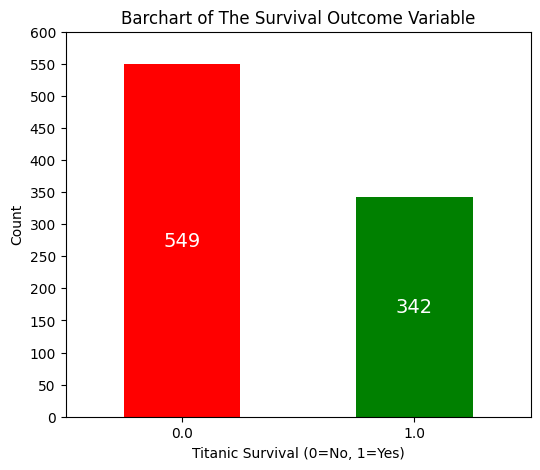

In [ ]:
# Barchart for the 'Survived' binary variable (0 = No, 1 = Yes) for the training dataset.
dfg = titanic_df['Survived'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of The Survival Outcome Variable', ylabel='Count', xlabel='Titanic Survival (0=No, 1=Yes)', color= ['r','g'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14)
plt.yticks(np.arange(0,601,step=50)) 
plt.show()

In [ ]:
# Evaluate the 'Pclass' numeric categorical variable distribution.
titanic_df['Pclass'].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

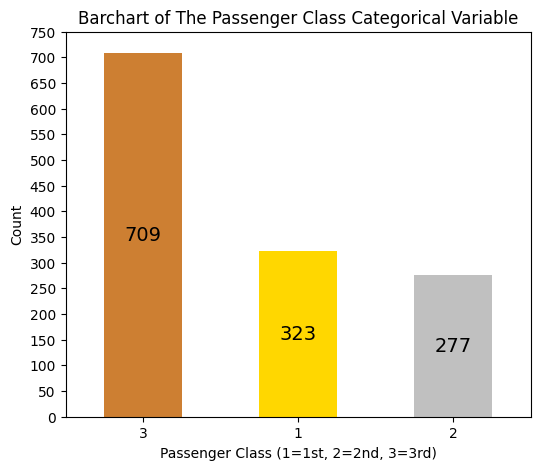

In [ ]:
# Barchart for the 'Pclass' numeric categorical variable (1=1st, 2=2nd, 3=3rd) distribution.
dfg = titanic_df['Pclass'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of The Passenger Class Categorical Variable', ylabel='Count', xlabel='Passenger Class (1=1st, 2=2nd, 3=3rd)', color= ['#CD7F32','gold','silver'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14)
plt.yticks(np.arange(0,751,step=50)) 
plt.show()

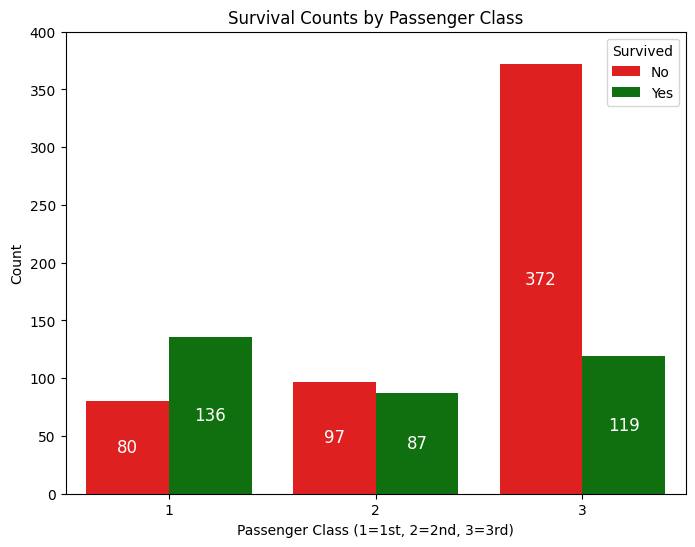

In [ ]:
# Bar chart for 'Pclass' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Pclass', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height / 2,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="center", color="white", fontsize=12)

plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class (1=1st, 2=2nd, 3=3rd)')
plt.ylabel('Count')
plt.yticks(np.arange(0,401,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

In [ ]:
# Create a 'Title' variable from the 'Name' character variable.
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.')

# Create a 'Surname' variable from the 'Name' character variable for family grouping.
titanic_df['Surname'] = titanic_df['Name'].str.split(', ').str[0]

In [ ]:
# Evaluate the 'Title' string character variable distribution.
titanic_df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

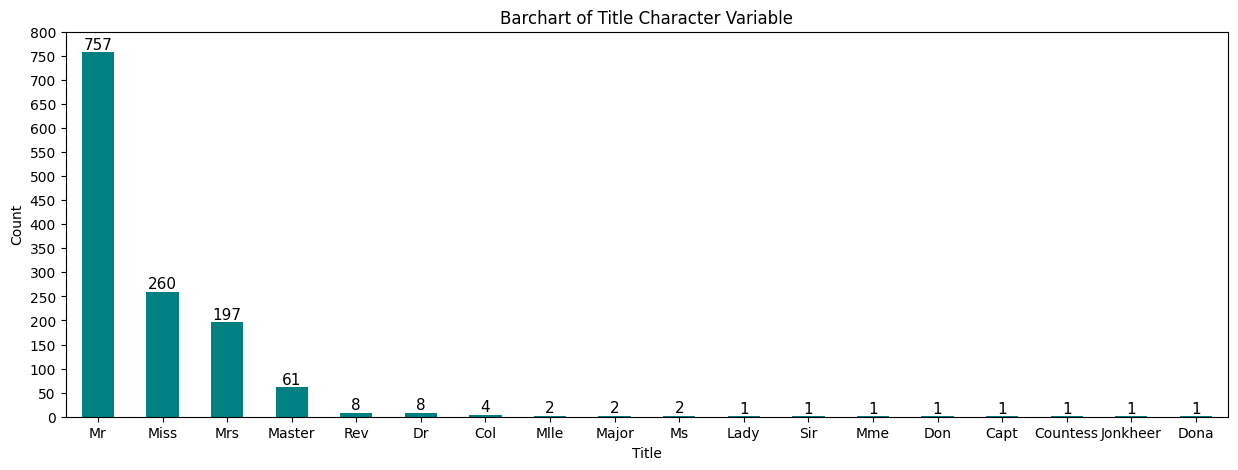

In [ ]:
# Barchart for the 'Title' string character variable distribution.
dfg = titanic_df['Title'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Title Character Variable', ylabel='Count', xlabel='Title', color= ['teal'], rot=0, figsize=(15,5))
ax.bar_label(ax.containers[0], color='black', fontsize=11)
plt.yticks(np.arange(0,801,step=50)) 
plt.show()

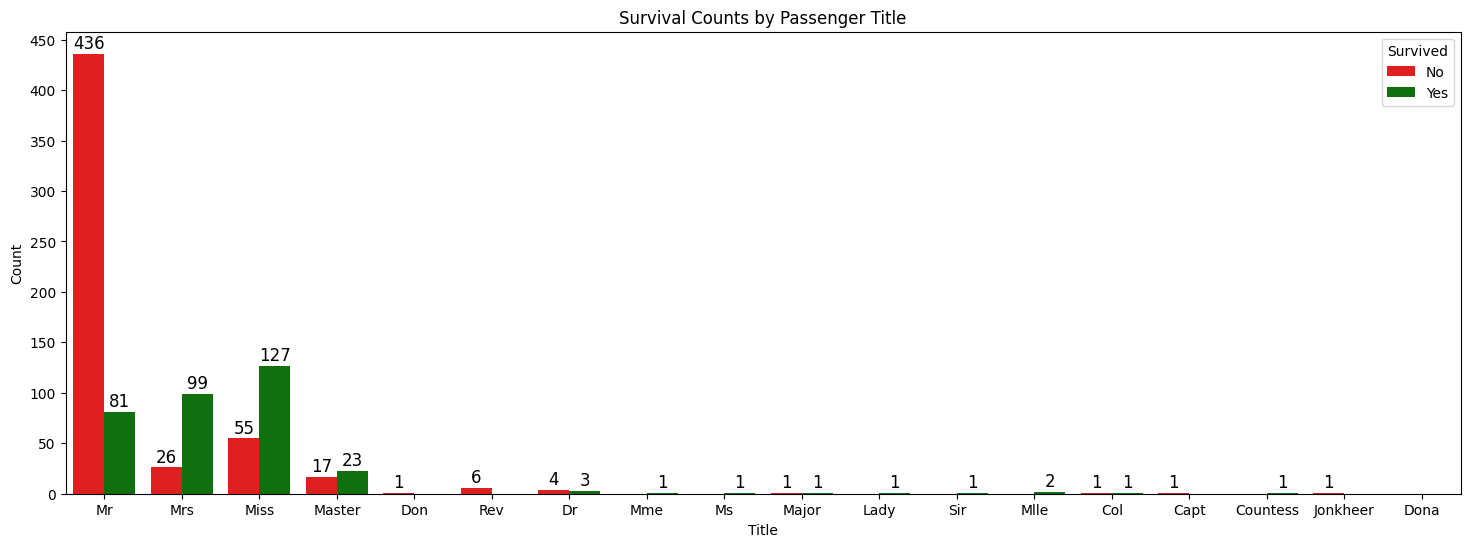

In [ ]:
# Bar chart for 'Title' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(18, 6))
ax = sns.countplot(x='Title', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 10,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="center", color="black", fontsize=12)

plt.title('Survival Counts by Passenger Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.yticks(np.arange(0,451,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

In [ ]:
# Evaluate the 'Surname' string character variable distribution.
titanic_df['Surname'].value_counts()

Surname
Andersson                 11
Sage                      11
Goodwin                    8
Asplund                    8
Davies                     7
Brown                      6
Panula                     6
Skoog                      6
Carter                     6
Rice                       6
Smith                      6
Fortune                    6
Johnson                    6
Ford                       6
Lefebre                    5
Williams                   5
Ryerson                    5
Palsson                    5
Kelly                      5
Thomas                     5
Baclini                    4
Hansen                     4
Hart                       4
Laroche                    4
Harris                     4
Elias                      4
West                       4
Johnston                   4
Ware                       4
Harper                     4
Boulos                     4
Gustafsson                 4
Johansson                  4
Goldsmith                  4
Dean  

In [ ]:
# Create FamilyID (Surname + Ticket) concatenated variable.
titanic_df['FamilyID'] = titanic_df['Surname'] + '_' + titanic_df['Ticket']

titanic_df['FamilyID'].head()

0              Braund_A/5 21171
1              Cumings_PC 17599
2    Heikkinen_STON/O2. 3101282
3               Futrelle_113803
4                  Allen_373450
Name: FamilyID, dtype: object

In [ ]:
# Evaluate the 'Sex' character categorical variable distribution.
titanic_df['Sex'].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

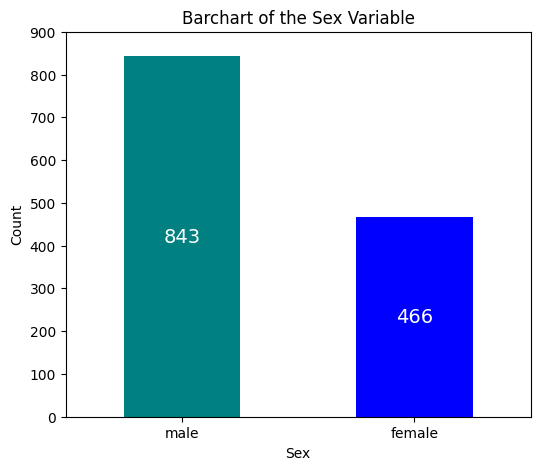

In [ ]:
# Barchart for the 'Sex' numeric variable distribution.
dfg = titanic_df['Sex'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Sex Variable', ylabel='Count', xlabel='Sex', color= ['teal','b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=14)
plt.yticks(np.arange(0,901,step=100)) 
plt.show()

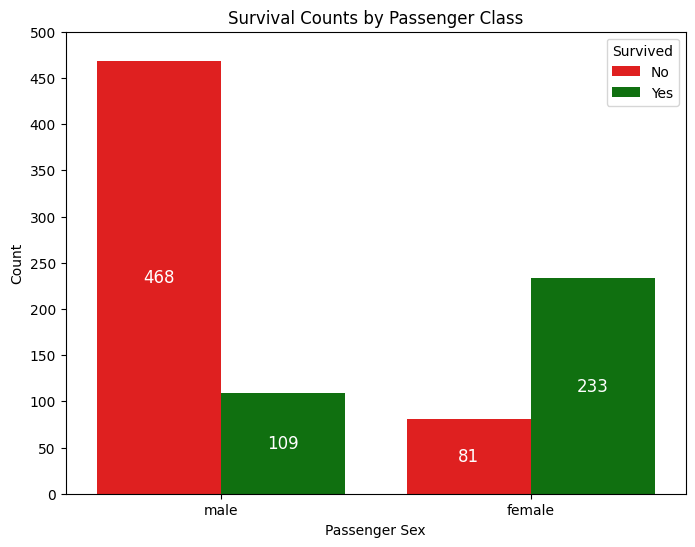

In [ ]:
# Bar chart for 'Sex' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height / 2,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="center", color="white", fontsize=12)

plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Sex')
plt.ylabel('Count')
plt.yticks(np.arange(0,501,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

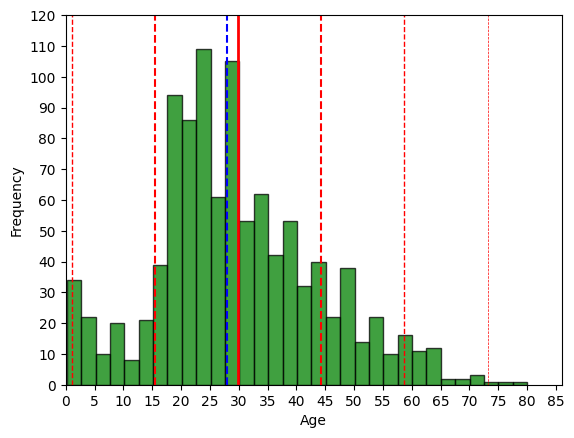

In [201]:
# Create temporary data with NaN values removed for 'Age' numeric variable charting.
agetemp_df = titanic_df.dropna(subset=['Age'])

# Histogram for the 'Age' numerical variable.
plt.hist(agetemp_df['Age'], bins = 32, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 86)
plt.xticks(np.arange(0,86,step=5))
plt.yticks(np.arange(0,121,step=10))

mean_value = agetemp_df['Age'].mean()
median_value = agetemp_df['Age'].median()
std_value = agetemp_df['Age'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

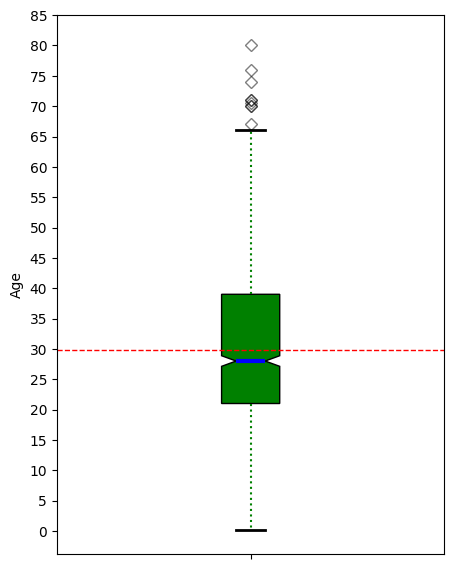

In [ ]:
# Boxplot for the 'Age' numeric variable distribution.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(agetemp_df['Age'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Age')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,86,step=5)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [203]:
# 'Age' Anderson-Darling Normality Test
result = anderson(agetemp_df['Age'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 7.130
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)


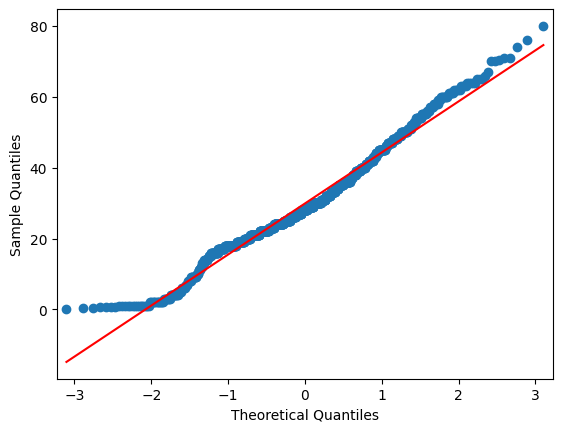

In [204]:
# 'Age' QQ plot
qqplot(agetemp_df['Age'], line='s')
plt.show()

In [205]:
# Evaluate skewness of the distribution for the 'Age' numeric variable.
age_skew = agetemp_df['Age'].skew()

print(f"Age distribution has a skewness of{age_skew: .3f}")

Age distribution has a skewness of 0.408


In [206]:
# Compute descriptive statistics for Age by Title for non-missing Age values.
titanic_df.groupby('Title')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Capt,1.0,70.000000,NaN,70.00,70.00,70.0,70.00,70.0
Col,4.0,54.000000,5.477226,47.00,51.50,54.5,57.00,60.0
Countess,1.0,33.000000,NaN,33.00,33.00,33.0,33.00,33.0
Don,1.0,40.000000,NaN,40.00,40.00,40.0,40.00,40.0
Dona,1.0,39.000000,NaN,39.00,39.00,39.0,39.00,39.0
Dr,7.0,43.571429,11.731115,23.00,38.00,49.0,51.50,54.0
Jonkheer,1.0,38.000000,NaN,38.00,38.00,38.0,38.00,38.0
Lady,1.0,48.000000,NaN,48.00,48.00,48.0,48.00,48.0
Major,2.0,48.500000,4.949747,45.00,46.75,48.5,50.25,52.0


In [ ]:
# Evaluate the 'SibSp' binary outcome variable distribution.
titanic_df['SibSp'].value_counts()

SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

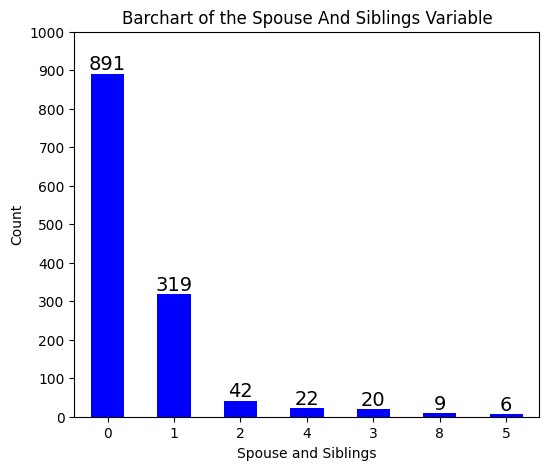

In [ ]:
# Barchart for the 'SibSp' numeric variable distribution.
dfg = titanic_df['SibSp'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Spouse And Siblings Variable', ylabel='Count', xlabel='Spouse and Siblings', color= ['b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14)
plt.yticks(np.arange(0,1001,step=100)) 
plt.show()

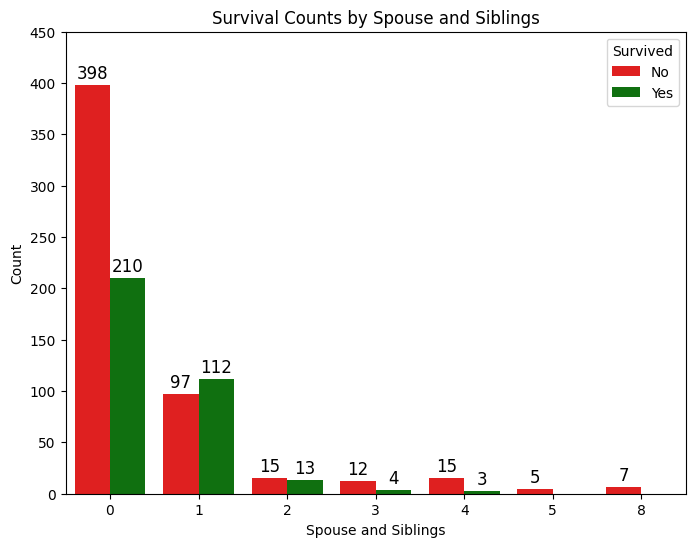

In [ ]:
# Bar chart for 'SibSp' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='SibSp', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 20,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=12)

plt.title('Survival Counts by Spouse and Siblings')
plt.xlabel('Spouse and Siblings')
plt.ylabel('Count')
plt.yticks(np.arange(0,451,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

In [ ]:
# Evaluate the 'Parch' numeric variable distribution.
titanic_df['Parch'].value_counts()

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

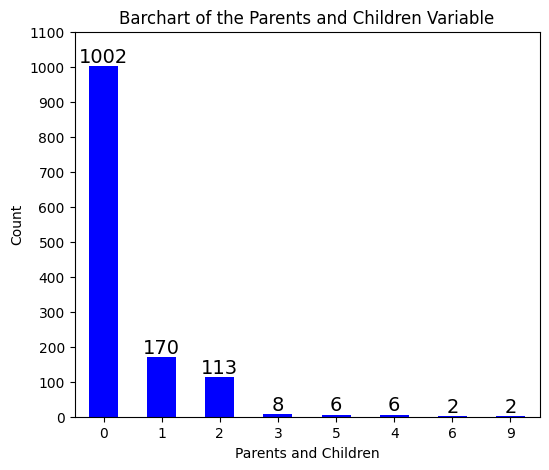

In [ ]:
# Barchart for the 'Parch' numeric variable distribution.
dfg = titanic_df['Parch'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Parents and Children Variable', ylabel='Count', xlabel='Parents and Children', color= ['b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14)
plt.yticks(np.arange(0,1101,step=100)) 
plt.show()

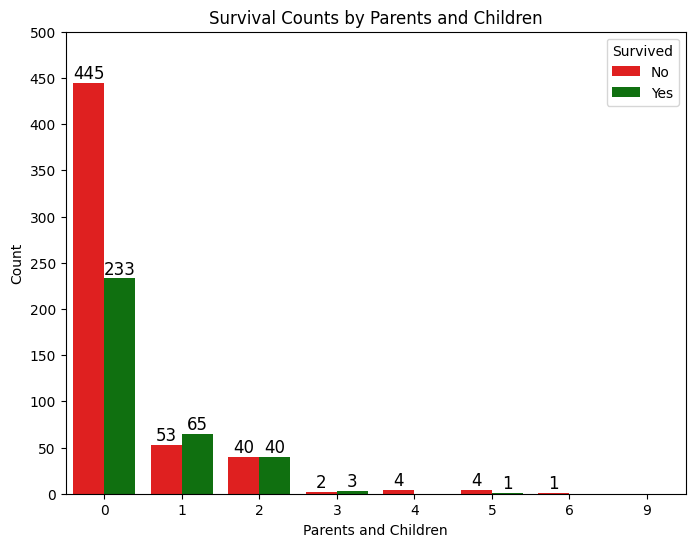

In [ ]:
# Bar chart for 'Parch' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Parch', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 20,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=12)

plt.title('Survival Counts by Parents and Children')
plt.xlabel('Parents and Children')
plt.ylabel('Count')
plt.yticks(np.arange(0,501,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

In [213]:
# Create 'FamilySize' variable by summing 'SibSp' and "Parch' variables.
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

In [ ]:
# Evaluate the 'FamilySize' numeric variable distribution.
titanic_df['FamilySize'].value_counts()

FamilySize
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

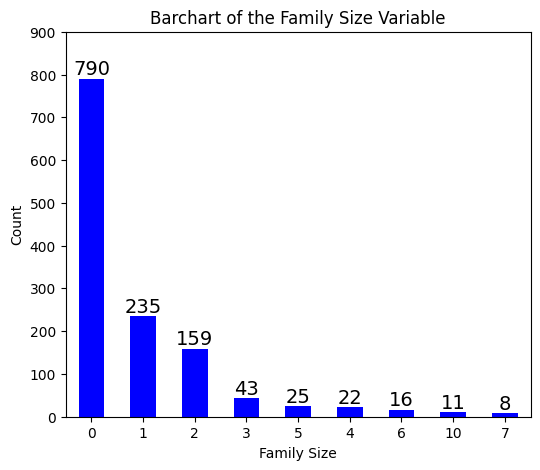

In [ ]:
# Barchart for the 'FamilySize' numeric variable distribution.
dfg = titanic_df['FamilySize'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Family Size Variable', ylabel='Count', xlabel='Family Size', color= ['b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14)
plt.yticks(np.arange(0,901,step=100)) 
plt.show()

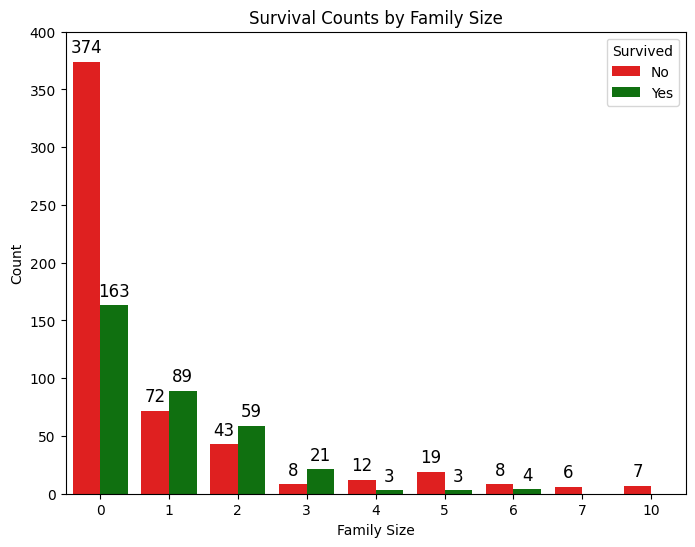

In [ ]:
# Bar chart for 'FamilySize' distibution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='FamilySize', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 20,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=12)

plt.title('Survival Counts by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.yticks(np.arange(0,401,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

In [217]:
# Function to parse Ticket into Prefix and Number.
def parse_ticket(ticket):
    # Split on the last space to separate prefix and number
    parts = ticket.rsplit(' ', 1)  # rsplit splits from the right, max 1 split
   
    if len(parts) == 2:
        # If there's a prefix and number
        prefix, number = parts
        # Clean up prefix (remove trailing dots or spaces)
        # prefix = prefix.strip().rstrip('.')
        return prefix, number
    else:
        # If there's no space, it's just a number
        return None, ticket

# Apply the parsing function and create new columns.
titanic_df[['TicketPrefix', 'TicketNumber']] = pd.DataFrame(
    titanic_df['Ticket'].apply(parse_ticket).tolist(),
    index=titanic_df.index
)

# Display the updated DataFrame to verify.
titanic_df[['Ticket', 'TicketPrefix', 'TicketNumber']].head(20)

,Ticket,TicketPrefix,TicketNumber
0,A/5 21171,A/5,21171
1,PC 17599,PC,17599
2,STON/O2. 3101282,STON/O2.,3101282
3,113803,None,113803
4,373450,None,373450
5,330877,None,330877
6,17463,None,17463
7,349909,None,349909
8,347742,None,347742
9,237736,None,237736


In [ ]:
# Evaluate the 'TicketPrefix' character variable distribution.
titanic_df['TicketPrefix'].value_counts()

TicketPrefix
PC             92
C.A.           46
SOTON/O.Q.     16
W./C.          14
STON/O 2.      14
A/5            12
CA.            12
SC/PARIS       11
A/5.           10
CA             10
F.C.C.          9
C               8
SOTON/OQ        8
S.O.C.          7
STON/O2.        7
S.O./P.P.       7
A/4             6
SC/Paris        5
SC/AH           4
PP              4
S.C./PARIS      3
SOTON/O2        3
A./5.           3
A.5.            3
F.C.            3
A/4.            3
SC              2
P/PP            2
WE/P            2
W.E.P.          2
C.A./SOTON      1
SC/A.3          1
STON/OQ.        1
AQ/4            1
A. 2.           1
LP              1
SC/A4           1
SW/PP           1
S.W./PP         1
SC/AH Basle     1
A/S             1
SCO/W           1
S.C./A.4.       1
W/C             1
Fa              1
S.O.P.          1
A4.             1
SO/C            1
S.P.            1
AQ/3.           1
Name: count, dtype: int64

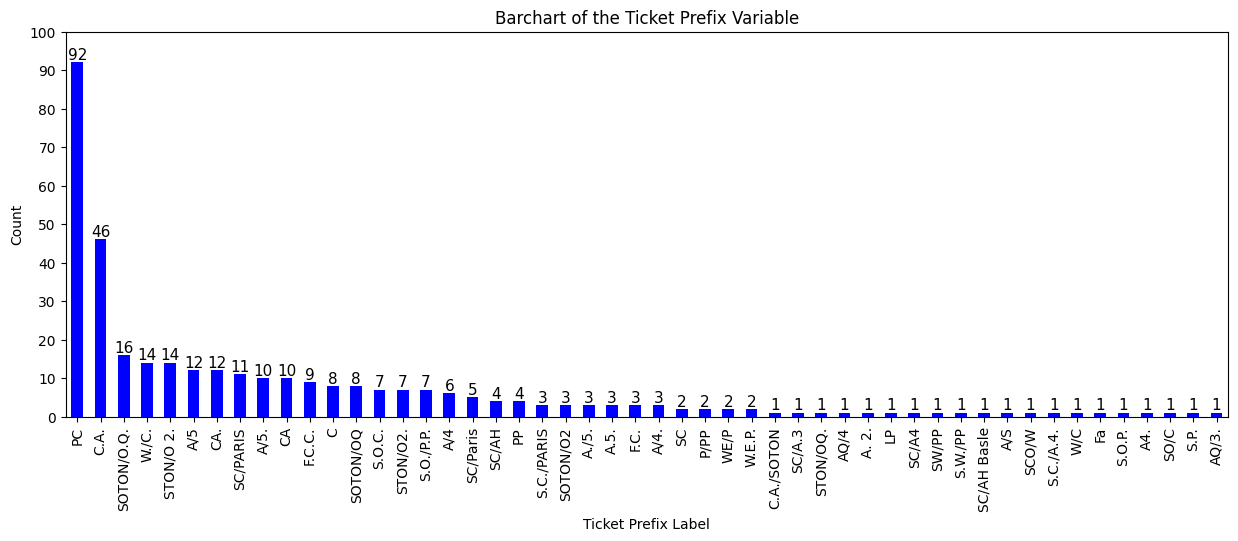

In [ ]:
# Barchart for the 'TicketPrefix' character variable distribution.
dfg = titanic_df['TicketPrefix'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Ticket Prefix Variable', ylabel='Count', xlabel='Ticket Prefix Label', color= ['b'], rot=0, figsize=(15,5))
ax.bar_label(ax.containers[0], color='black', fontsize=11)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,101,step=10)) 
plt.show()

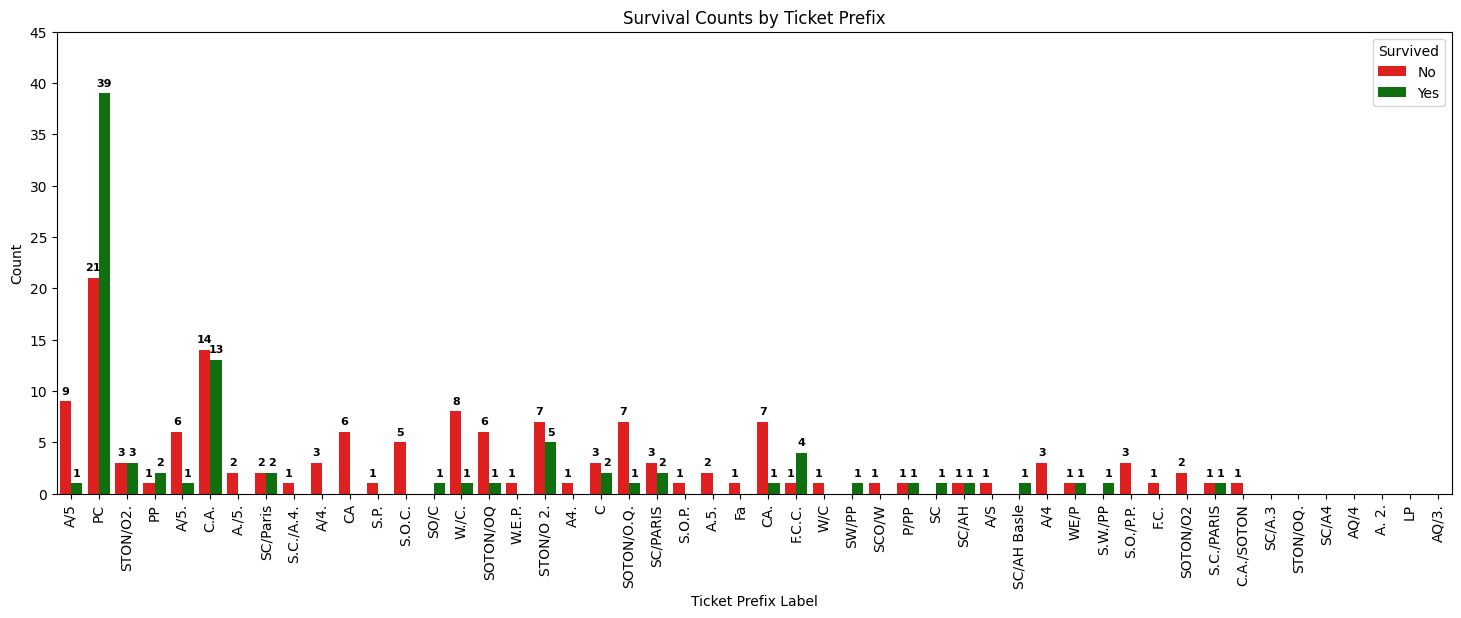

In [220]:
# Bar chart for 'TicketPrefix' with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(18, 6))
ax = sns.countplot(x='TicketPrefix', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 1.5,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=8, fontweight='bold')

plt.title('Survival Counts by Ticket Prefix')
plt.xlabel('Ticket Prefix Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,46,step=5))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

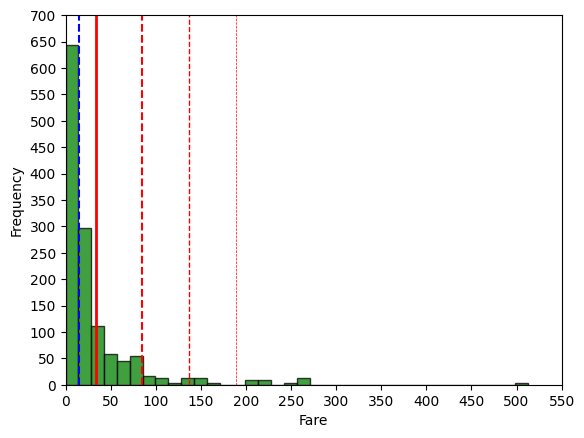

In [221]:
# Create temporary data with NaN values removed for 'Fare' numeric variable charting.
faretemp_df = titanic_df.dropna(subset=['Fare'])

# Histogram for the 'Fare' numerical variable.
plt.hist(faretemp_df['Fare'], bins = 36, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.xlim(0, 86)
plt.xticks(np.arange(0,551,step=50))
plt.yticks(np.arange(0,701,step=50))

mean_value = faretemp_df['Fare'].mean()
median_value = faretemp_df['Fare'].median()
std_value = faretemp_df['Fare'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

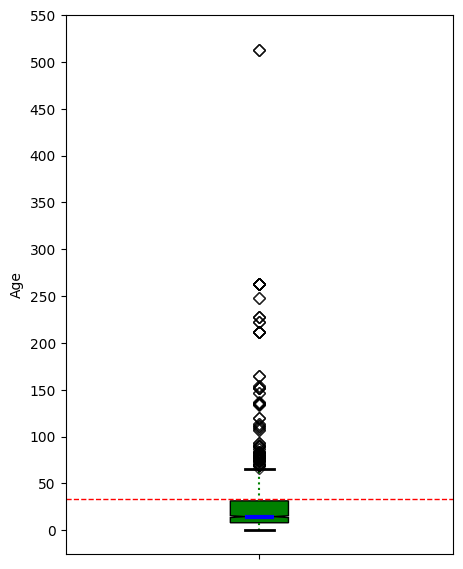

In [ ]:
# Boxplot for the 'Fare' numeric variable distribution.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(faretemp_df['Fare'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Age')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,551,step=50)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [229]:
# 'Fare' Anderson-Darling Normality Test
result = anderson(faretemp_df['Fare'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 186.890
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


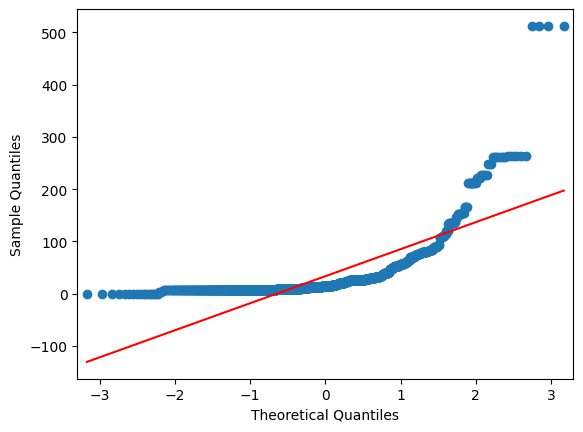

In [230]:
# 'Fare' QQ plot
qqplot(faretemp_df['Fare'], line='s')
plt.show()

In [231]:
# Evaluate skewness of the distribution for the 'Fare' numeric variable.
fare_skew = faretemp_df['Fare'].skew()

print(f"Fare distribution has a skewness of{fare_skew: .3f}")

Fare distribution has a skewness of 4.368


In [234]:
# Function to create 'Deck' variable from 'Cabin' variable.
def extract_deck(cabin):
    if pd.isna(cabin):  # Handle NaN values
        return "Lower"
    # Split on space and take the first cabin (if multiple)
    first_cabin = cabin.split()[0]
    # Take the first letter as the deck
    return first_cabin[0]

# Create the Deck variable
titanic_df['Deck'] = titanic_df['Cabin'].apply(extract_deck)

# Evaluate the 'TicketPrefix' character variable distribution.
titanic_df['Deck'].value_counts()

Deck
Lower    1014
C          94
B          65
D          46
E          41
A          22
F          21
G           5
T           1
Name: count, dtype: int64

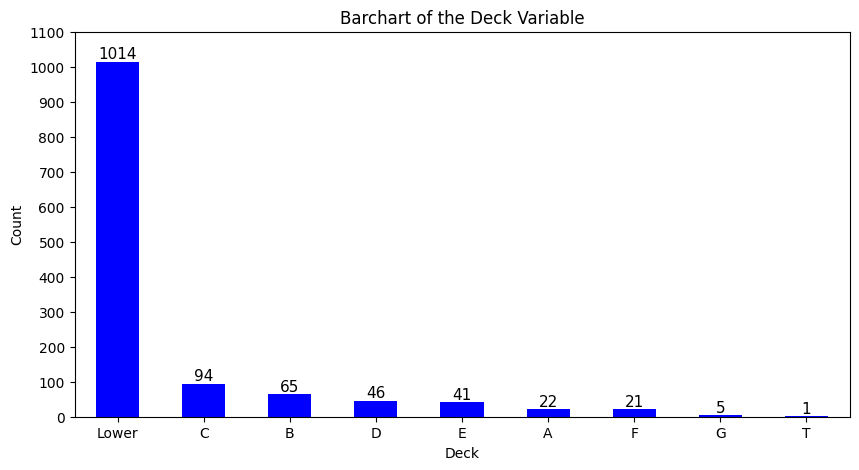

In [236]:
# Barchart for the 'Deck' character variable distribution.
dfg = titanic_df['Deck'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Deck Variable', ylabel='Count', xlabel='Deck', color= ['b'], rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], color='black', fontsize=11)
plt.yticks(np.arange(0,1101,step=100)) 
plt.show()

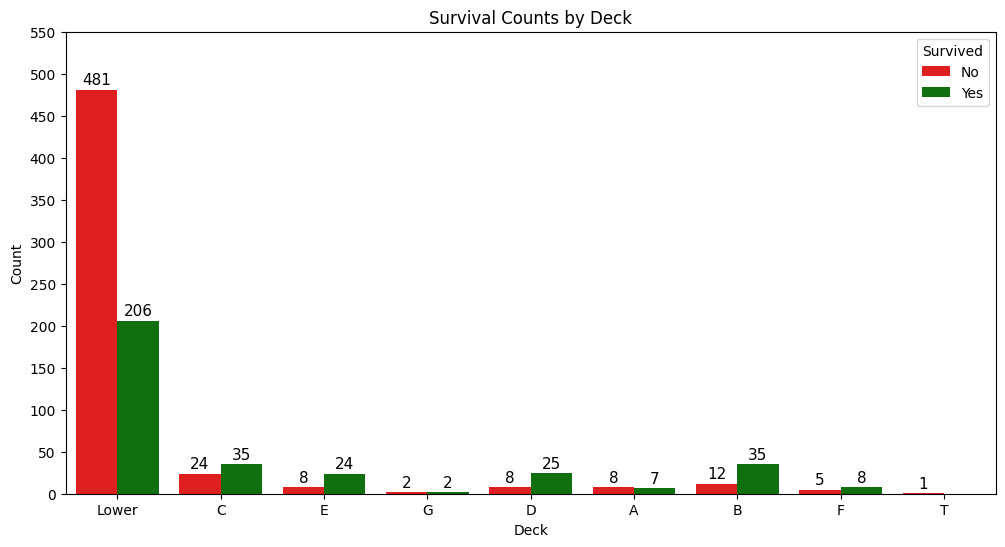

In [ ]:
# Bar chart for 'Deck' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Deck', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 20,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=11)

plt.title('Survival Counts by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.yticks(np.arange(0,551,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

In [89]:
# Evaluate the 'Embarked' categorical variable.
titanic_df['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

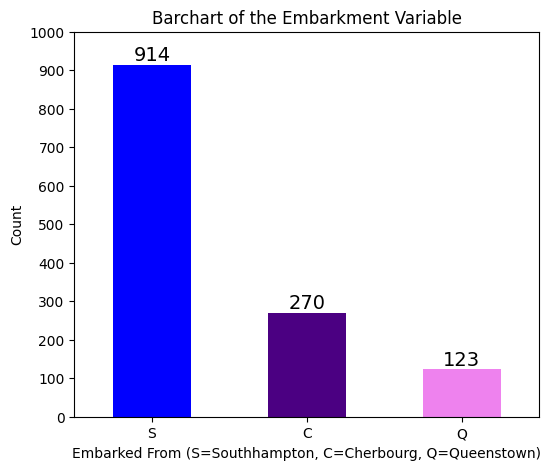

In [93]:
# Barchart for the 'Embarked' categorical variable.
dfg = titanic_df['Embarked'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Embarkment Variable', ylabel='Count', xlabel='Embarked From (S=Southhampton, C=Cherbourg, Q=Queenstown)', color= ['blue', 'indigo', 'violet'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14)
plt.yticks(np.arange(0,1001,step=100)) 
plt.show()

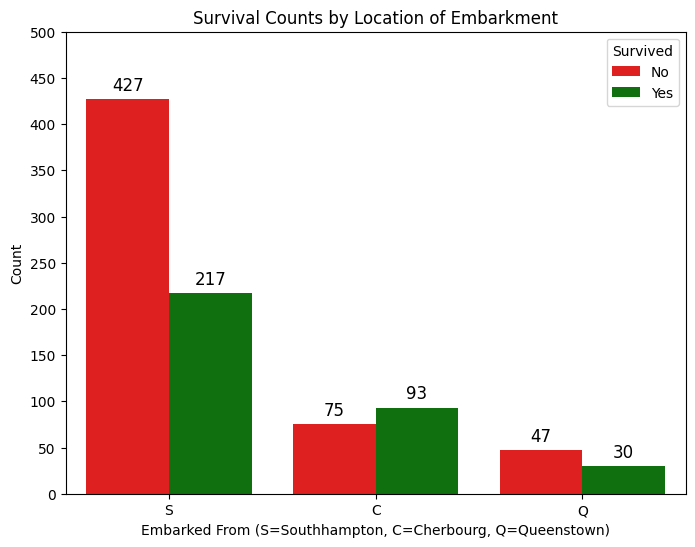

In [ ]:
# Bar chart for 'Embarked' with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Embarked', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 25,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=12)

plt.title('Survival Counts by Location of Embarkment')
plt.xlabel('Embarked From (S=Southhampton, C=Cherbourg, Q=Queenstown)')
plt.ylabel('Count')
plt.yticks(np.arange(0,501,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

In [ ]:
# 2. Age Imputation
# Step 1: Impute using family group medians
df['Age'] = df.groupby('FamilyID')['Age'].transform(lambda x: x.fillna(x.median()))

# Step 2: For remaining missing ages, use Title and Pclass medians
df['Age'] = df.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# Step 3: Special case for mothers (Mrs with Parch > 0)
mothers = (df['Title'] == 'Mrs') & (df['Parch'] > 0)
df.loc[mothers, 'Age'] = df[mothers].apply(
    lambda row: row['Age'] if pd.notnull(row['Age']) else
    df[(df['FamilyID'] == row['FamilyID']) & (df['Age'] < 18)]['Age'].max() + 25, axis=1
)

# Fill any remaining NaN ages with overall median
df['Age'] = df['Age'].fillna(df['Age'].median())

# 3. Split Train and Test
train_df = df[df['Survived'].notna()]
test_df = df[df['Survived'].isna()].drop('Survived', axis=1)

# 4. Exploratory Data Analysis (on training set)
# Survival rate by Deck
print("Survival Rate by Deck:")
print(train_df.groupby('Deck')['Survived'].mean().sort_values())

# Survival rate by Embarked
train_df['Embarked'] = train_df['Embarked'].fillna('S')  # Fill missing Embarked
print("\nSurvival Rate by Embarked:")
print(train_df.groupby('Embarked')['Survived'].mean())

# Survival rate by FamilySize
print("\nSurvival Rate by FamilySize:")
print(train_df.groupby('FamilySize')['Survived'].mean())

# Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x='Deck', y='Survived', data=train_df, order=sorted(train_df['Deck'].unique()))
plt.title('Survival Rate by Deck')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.title('Survival Rate by Embarked')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=train_df)
plt.title('Survival Rate by FamilySize')
plt.show()

# 5. Preprocessing for Modeling
# Encode categorical variables
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].fillna('S')

# One-hot encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Embarked', 'Title', 'Deck'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked', 'Title', 'Deck'], drop_first=True)

# Align test set columns with train set
test_df = test_df.reindex(columns=train_df.columns.drop('Survived'), fill_value=0)

# Select features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'FamilySize'] + \
           [col for col in train_df.columns if col.startswith('Embarked_') or col.startswith('Title_') or col.startswith('Deck_')]

X_train = train_df[features]
y_train = train_df['Survived']
X_test = test_df[features]

# 6. Train Baseline Model
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split)
y_pred = model.predict(X_val)
print("\nValidation Accuracy:", accuracy_score(y_val, y_pred))

# 7. Predict on Test Set for Submission
test_predictions = model.predict(X_test)
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions.astype(int)
})
submission.to_csv('submission.csv', index=False)
print("\nSubmission file created: submission.csv")